## Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
import warnings
warnings.filterwarnings('ignore')

## 時系列データの読み込み

In [2]:
df = pd.read_csv('data/LoadData.csv')
df.head()

,Date,N_Y_C_
0,05/01/2007 00:00:00,4854.400000
1,05/01/2007 00:15:00,4777.370779
2,05/01/2007 00:30:00,4729.483400
3,05/01/2007 00:45:00,4682.387550
4,05/01/2007 01:00:00,4587.337550


                 N_Y_C_
Timestamp              
2007-05-01  5666.252902
2007-05-02  5666.180415
2007-05-03  5662.574479
2007-05-04  5615.351488
2007-05-05  5032.153638
...                 ...
2019-02-24  5144.902344
2019-02-25  5790.148177
2019-02-26  6000.704688
2019-02-27  6114.133594
2019-02-28  5978.750781

[4322 rows x 1 columns]


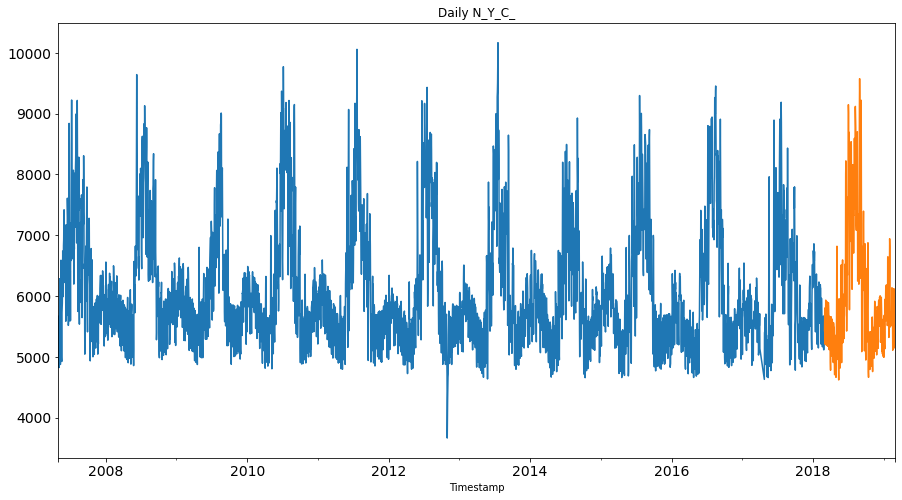

In [3]:
# Creating train and test set
# Index 379877 marks the start of March 2018
train = df[:379876]
test = df[379877:]

# Aggregating the dataset at daily level
df['Timestamp'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M:%S')
df.index = df['Timestamp']
df = df.resample('D').mean()
print(df)

train['Timestamp'] = pd.to_datetime(train['Date'], format='%m/%d/%Y %H:%M:%S')
train.index = train['Timestamp']
train = train.resample('D').mean()

test['Timestamp'] = pd.to_datetime(test['Date'], format='%m/%d/%Y %H:%M:%S')
test.index = test['Timestamp']
test = test.resample('D').mean()

# Plotting data
train.N_Y_C_.plot(figsize=(15, 8), title='Daily N_Y_C_', fontsize=14)
test.N_Y_C_.plot(figsize=(15, 8), title='Daily N_Y_C_', fontsize=14)
plt.show()

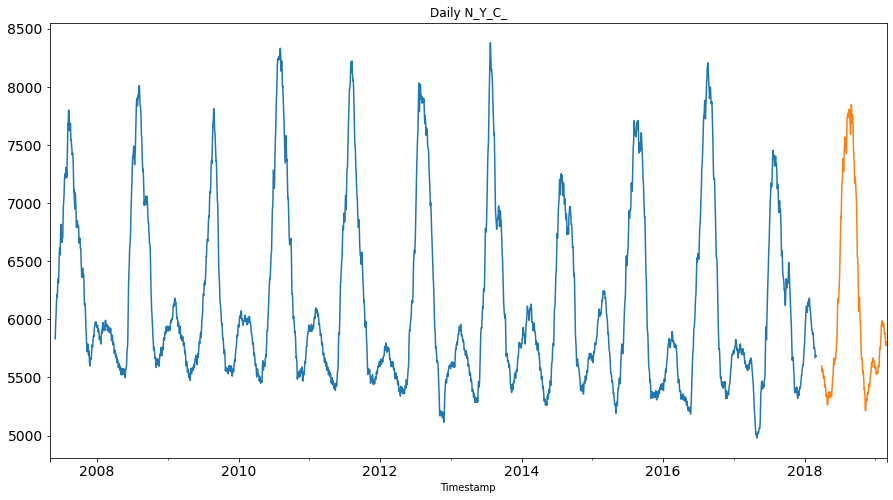

In [4]:
# smooth the graph
df_mean = df.N_Y_C_.rolling(window=30).mean()
train_mean = train.N_Y_C_.rolling(window=30).mean()
test_mean = test.N_Y_C_.rolling(window=30).mean()
train_mean.plot(figsize=(15, 8), title='Daily N_Y_C_', fontsize=14)
test_mean.plot(figsize=(15, 8), title='Daily N_Y_C_', fontsize=14)
plt.show()

## ARIMAモデルの推定

### 和分過程

d-1階差分をとった系列は非定常過程であるが、d階差分をとった系列が定常過程に従う過程は、d次和分過程、もしくはI(d)過程と呼ばれます。また、I(0)過程は定常過程で定義されます。

### ARIMA過程

d階差分をとった系列が定常かつ反転可能なARMA(p,q)過程に従う過程は、次数(p,d,q)の自己回帰和分移動平均過程、もしくはARIMA(p,d,q)過程と呼ばれます。

In [5]:
# 和分過程なので、差分をとる
diff = df_mean - df_mean.shift()
diff = diff.dropna()
diff.head()

Timestamp
2007-05-31    55.905093
2007-06-01    58.357213
2007-06-02    44.345574
2007-06-03    24.333066
2007-06-04    50.992386
Freq: D, Name: N_Y_C_, dtype: float64

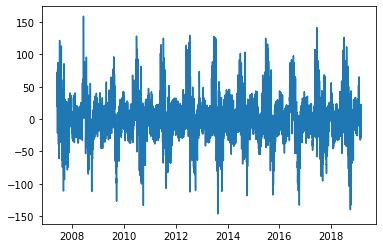

In [6]:
# 差分系列のグラフ
plt.plot(diff)

In [7]:
# 差分系列への自動ARMA推定関数の実行
resDiff = sm.tsa.arma_order_select_ic(diff, ic='aic', trend='c')
resDiff

{'aic':               0             1             2
 0  42826.466380  39362.779871  38560.624471
 1  39472.646493  38505.185738  38497.407444
 2  39069.804527  38505.484469  38494.790914
 3  38556.023828  38364.952998  37651.795528
 4  38388.405947  38327.389235  36951.543297,
 'aic_min_order': (4, 2)}

In [8]:
# 差分系列への自動ARMA推定関数の実行
resDiff = sm.tsa.arma_order_select_ic(diff, ic='bic', trend='c')
resDiff

{'bic':               0             1             2
 0  42839.195396  39381.873395  38586.082504
 1  39491.740017  38530.643771  38529.229984
 2  39095.262559  38537.307009  38532.977963
 3  38587.846369  38403.140047  37696.347085
 4  38426.592996  38371.940792  37002.459362,
 'bic_min_order': (4, 2)}

## SARIMAモデル（季節自己回帰和分移動平均モデル）

order=(p, d, q)はARIMAモデルのパラメータで、それぞれ、AR、階差、MAのパラメータです。例えば(1, 0, 0)の場合、AR(1)モデルを表します。

seasonal_order=(sp, sd, sq, s)は季節性のパラメータで、sが周期になります。今回は12日間の周期なので`s=12`にします。

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.76682D+00    |proj g|=  2.05233D+00

At iterate    5    f=  4.57913D+00    |proj g|=  2.21406D-01

At iterate   10    f=  4.54615D+00    |proj g|=  3.61458D-01

At iterate   15    f=  4.49135D+00    |proj g|=  1.96910D-01

At iterate   20    f=  4.45032D+00    |proj g|=  1.10490D-01

At iterate   25    f=  4.43122D+00    |proj g|=  9.90233D-02

At iterate   30    f=  4.40622D+00    |proj g|=  1.43955D-01

At iterate   35    f=  4.36829D+00    |proj g|=  1.90944D-01

At iterate   40    f=  4.35582D+00    |proj g|=  9.32939D-02

At iterate   45    f=  4.35392D+00    |proj g|=  4.14370D-02

At iterate   50    f=  4.35382D+00    |proj g|=  1.41708D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

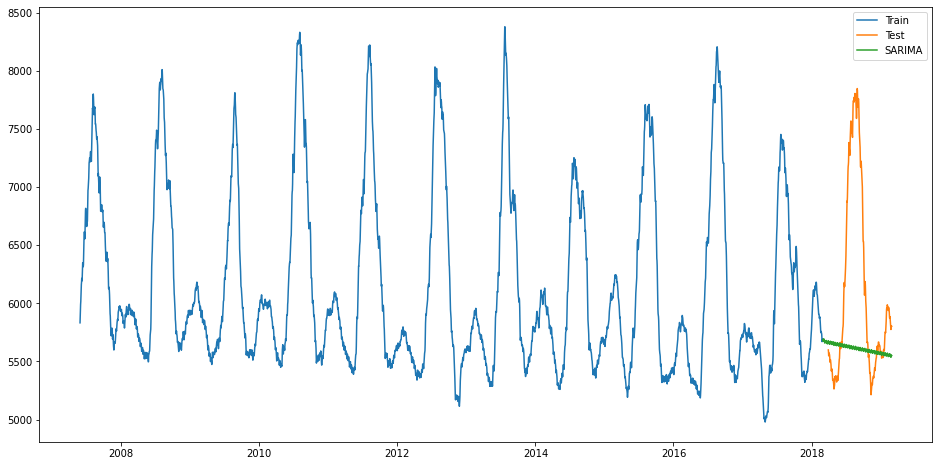

In [9]:
# Predictions
model = sm.tsa.statespace.SARIMAX(train_mean,
                                  order=(4, 1, 2), seasonal_order=(1, 1, 1, 12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False).fit()
pred = model.predict(start="2018-03-01", end="2019-02-28", dynamic=False, full_results=True)
plt.figure(figsize=(16, 8))
plt.plot(train_mean, label='Train')
plt.plot(test_mean, label='Test')
plt.plot(pred, label='SARIMA')
plt.legend(loc='best')
plt.show()

In [10]:
print(model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                               N_Y_C_   No. Observations:                 3957
Model:             SARIMAX(4, 1, 2)x(1, 1, [1], 12)   Log Likelihood              -17228.071
Date:                              Wed, 30 Mar 2022   AIC                          34474.141
Time:                                      11:11:06   BIC                          34530.624
Sample:                                  05-01-2007   HQIC                         34494.181
                                       - 02-28-2018                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7210      0.024     30.498      0.000       0.675       0.767
ar.L2         -0.94

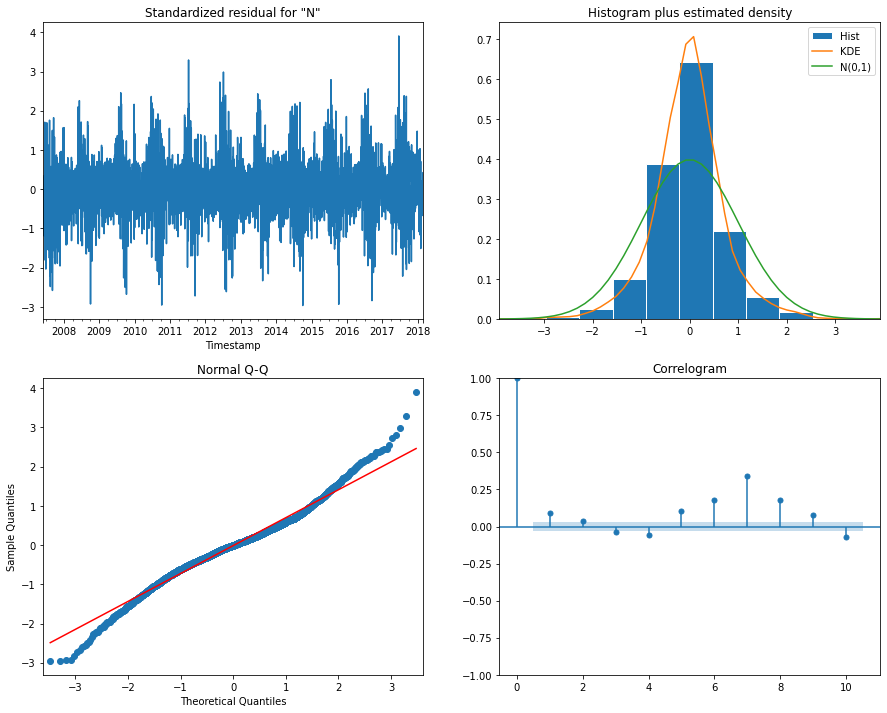

In [ ]:
# 標準化した残差の時系列プロット、残差のヒストグラムと正規分布（とKDE分布）の密度関数、残差の正規QQプロット、残差の自己相関関数
model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
# https://www.bilibili.com/read/cv10362156